<a href="https://colab.research.google.com/github/chinmayithumma/MLTasks/blob/main/task_2_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
                                               review  sentiment
0  I loved the product! It was amazing and worked...          1
1           Terrible experience, will not buy again.          0
2           Absolutely fantastic! Worth every penny.          1
3         Worst purchase ever, totally disappointed.          0
4       Very satisfied with the quality and service.          1

✅ Model Accuracy: 0.3333

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



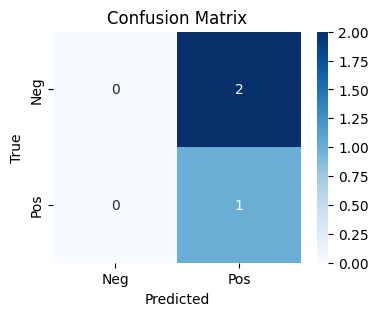

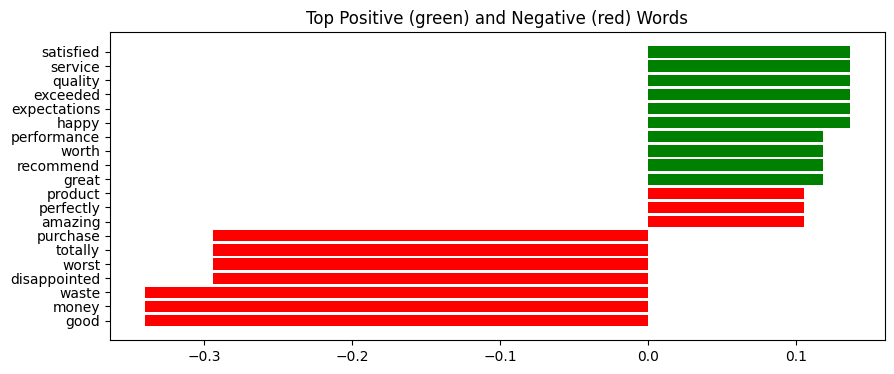


Sample Review: 'This product is not worth the money.'
Predicted Sentiment: 😊 Positive


In [1]:

# 1️⃣ Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# 2️⃣ Create or load dataset
data = {
    'review': [
        "I loved the product! It was amazing and worked perfectly.",
        "Terrible experience, will not buy again.",
        "Absolutely fantastic! Worth every penny.",
        "Worst purchase ever, totally disappointed.",
        "Very satisfied with the quality and service.",
        "It broke after one use, horrible quality.",
        "I’m so happy, exceeded my expectations!",
        "Not good, waste of money.",
        "The product is decent for the price.",
        "Great performance, highly recommend!"
    ],
    'sentiment': [1,0,1,0,1,0,1,0,1,1]  # 1=Positive, 0=Negative
}
df = pd.DataFrame(data)
print("Sample Data:\n", df.head())

# 3️⃣ Preprocessing
X = df['review']
y = df['sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf  = vectorizer.transform(X_test)

# 5️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 6️⃣ Evaluate Model
y_pred = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative','Positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg','Pos'], yticklabels=['Neg','Pos'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 7️⃣ Visualize top positive & negative words
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_[0]
top_pos_idx = np.argsort(coefs)[-10:]
top_neg_idx = np.argsort(coefs)[:10]

plt.figure(figsize=(10,4))
plt.barh(feature_names[top_neg_idx], coefs[top_neg_idx], color='red')
plt.barh(feature_names[top_pos_idx], coefs[top_pos_idx], color='green')
plt.title("Top Positive (green) and Negative (red) Words")
plt.show()

sample = ["This product is not worth the money."]
sample_tfidf = vectorizer.transform(sample)
pred = model.predict(sample_tfidf)[0]
print(f"\nSample Review: '{sample[0]}'")
print("Predicted Sentiment:", "😊 Positive" if pred==1 else "😞 Negative")
